In [4]:
#using my own datasets
#import modules
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import pandas as pd

In [5]:
#reading the data from the csv file
df = pd.read_csv('art_coverage_by_country_clean.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 11 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Country                                                         170 non-null    object 
 1   Reported number of people receiving ART                         170 non-null    object 
 2   Estimated number of people living with HIV                      170 non-null    object 
 3   Estimated ART coverage among people living with HIV (%)         170 non-null    object 
 4   Estimated number of people living with HIV_median               138 non-null    float64
 5   Estimated number of people living with HIV_min                  138 non-null    float64
 6   Estimated number of people living with HIV_max                  138 non-null    float64
 7   Estimated ART coverage among people living with HIV (

In [6]:
#dropping the null files and changing the datatype
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
df['Reported number of people receiving ART'] = df['Reported number of people receiving ART'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 169
Data columns (total 11 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Country                                                         136 non-null    object 
 1   Reported number of people receiving ART                         136 non-null    float64
 2   Estimated number of people living with HIV                      136 non-null    object 
 3   Estimated ART coverage among people living with HIV (%)         136 non-null    object 
 4   Estimated number of people living with HIV_median               136 non-null    float64
 5   Estimated number of people living with HIV_min                  136 non-null    float64
 6   Estimated number of people living with HIV_max                  136 non-null    float64
 7   Estimated ART coverage among people living with HIV (

In [9]:
#pakai data tengah data 30 sampai 40
X = df.iloc[30:41,[1,7]]
print(X)


    Reported number of people receiving ART  \
38                                 252000.0   
39                                   1200.0   
40                                  21900.0   
42                                   2600.0   
44                                 256000.0   
45                                   5500.0   
46                                   2700.0   
47                                  39000.0   
48                                  25100.0   
49                                   6700.0   
50                                  11900.0   

    Estimated ART coverage among people living with HIV (%)_median  
38                                               55.0               
39                                               75.0               
40                                               72.0               
42                                               60.0               
44                                               57.0               
45                   

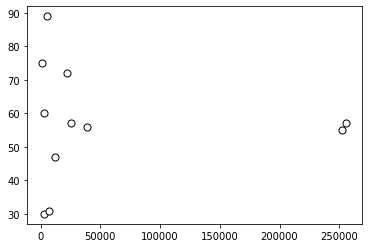

In [11]:
#plotting
plt.scatter(
   df.iloc[30:41, 1], df.iloc[30:41, 7],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

In [12]:
# train K-Means clustering
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)
print(y_km)

[0 1 2 1 0 1 1 2 2 1 1]


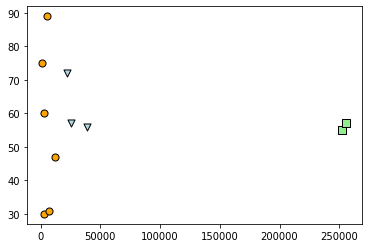

In [13]:
# plot the 3 clusters
plt.scatter(
    X.iloc[[0,4],0], X.iloc[[0,4],1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='C1'
)

plt.scatter(
    X.iloc[[1,3,5,6,9,10],0], X.iloc[[1,3,5,6,9,10],1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='C2'
)

plt.scatter(
    X.iloc[[2,7,8],0], X.iloc[[2,7,8],1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='C3'
)

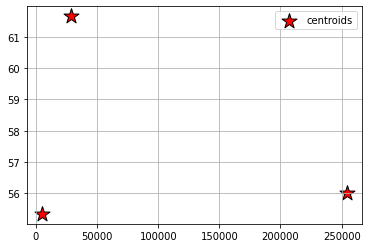

In [16]:
# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [18]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

print(distortions)

[96436939455.27274, 1360245310.4444444, 249469674.66666663, 193981591.3333333, 37676292.5, 15249513.166666668, 13847246.5, 5847244.5, 727132.0, 5450.0]


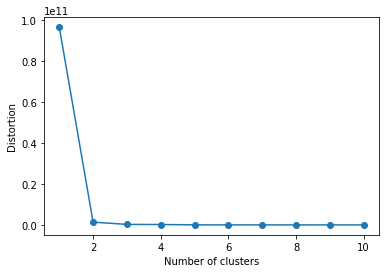

In [21]:
# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()